In [ ]:
from sampling.distributions import Triangle, Normal
from sampling.samplers import UniformSampler, RejectionSampler

import seaborn as sns
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sns.set()

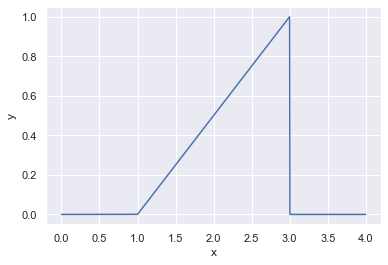

In [6]:
x = np.linspace(0, 4, 1_000)
dist = Triangle(1, 3)
y = [dist.pdf(x_) for x_ in x]

sns.lineplot(data={"x": x, "y": y}, x="x", y="y")
plt.savefig("triangle.png")

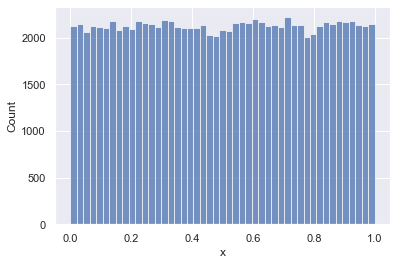

In [11]:
sns.histplot(
    data={"x": [random.random() for _ in range(100_000)]}, 
    x="x",
)
plt.savefig("uniform1.png")

  0%|          | 0/1000000 [00:00<?, ?it/s]

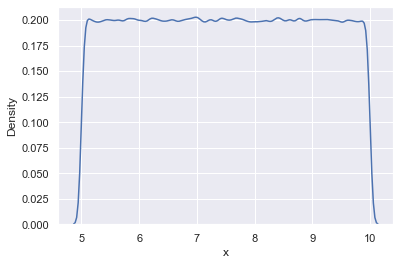

In [16]:
def plot_pdf(sampler: Sampler, n=1_000_000):
    samples = [sampler.draw() for _ in tqdm(range(n))]
    sns.kdeplot(data={"x": samples}, x="x", bw_adjust=0.5)

plot_pdf(UniformSampler(5, 10))
plt.savefig("uniform2.png")

In [14]:
def transform_sampler(sampler: Sampler, f: Callable[[float], float]) -> Sampler:
    return FunctionSampler(func=lambda: f(sampler.draw()))

  0%|          | 0/1000000 [00:00<?, ?it/s]

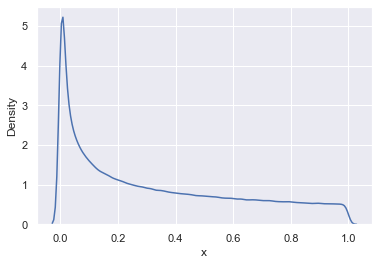

In [15]:
squared_uniform_sampler = transform_sampler(UniformSampler(0, 1), lambda x: x ** 2)
plot_pdf(squared_uniform_sampler)

Let $X$ be distributed uniformly between $l$ and $u$. Then $p(x) = \frac{1}{u - l}$.

We have some unknown distribution $T$. We know the pdf of $T$ is $f$.

We want to know what the pdf of $f(X)$ is.

We know that $p(f(X)=f(x)) = \frac{1}{u - l}$ for $x \in [l, u]$. 

However, we can't get from this to $p(X = x)$ unless we know how to invert $f$. For some special functions we have that, but for a general function defined computationally, we don't.

  0%|          | 0/100000 [00:00<?, ?it/s]

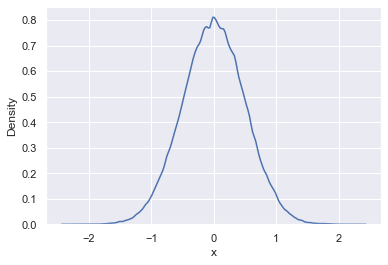

In [19]:
sampler = RejectionSampler(Normal(0, 1), lower=-20, upper=20)
plot_pdf(sampler, n=100_000)
plt.savefig("normal_pdf.png")

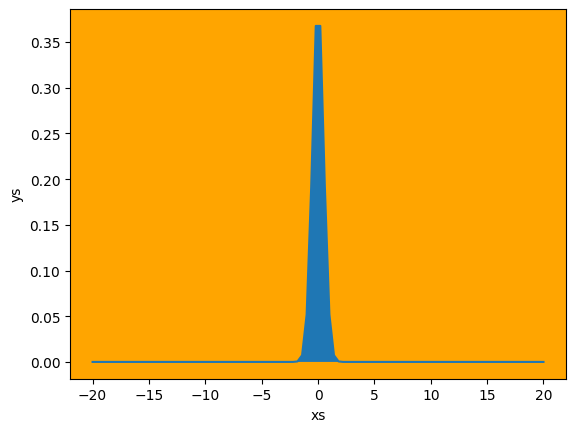

In [24]:
sns.reset_orig()
xs = np.linspace(-20, 20, 100)
ys = Normal(0, 1).pdf(xs)
fig = sns.lineplot(data={"xs": xs, "ys": ys}, x="xs", y="ys")
fig.set_facecolor("orange")
plt.fill_between(xs, ys)
plt.savefig("orange_and_blue.png")